# AMAT503:  Lecture 07

January 29, 2018.

Michael Lamoureux

# HEADS' UP!

I will be using [Jupyter notebooks](https://jupyter.org) in this classroom, to combine text, math, and graphics. 

Students can access Jupyter at [ucalgary.syzygy.ca](https://ucalgary.syzygy.ca)

An eBook on how to use syzygy is here: [intro.syzygy.ca](http://intro.syzygy.ca)

Lecture notes, code, assignments, etc are available on a git repo: [github.com/mlamoureux](https://github.com/mlamoureux)

The textbnook for the course is available electronically
[here](https://ucalgary.summon.serialssolutions.com/#!/#!%2Fsearch%3FbookMark=ePnHCXMwhZ3bCoJAEIYNvCjrGcq6CLoQFMLoNjN6gO4H6QBSWLRrh7fvH2ddC4QuxQ_Fw87-M7v7r-e4yFuPHXFTYoMxiNIYSbV43SxC_EMRdyEeV8mQFIlTMnQJOl9ogW5dIGGvc2RuPcdf52hBkJD-M-PNGLSvvzQdvs3AcfW9RDQdbdJdsg2MheubTAWEeBZXHLHXXiBEs6iByiIveOdjKvcR8YIWZChLhHZ2au87M-EzdUbIQTjSih6XahhT0c_zgR0Lq7ITslyyTPPMYKbC1FGfqkuZaZiUrhLId-gLgEMBZfCYbuI8QVFYjZPy9pmTVkC_dCvULKiyqL2VgbiIcrja03KI5h3PGfr3aj8nd5KS)

or [here](https://proquest-safaribooksonline-com.ezproxy.lib.ucalgary.ca/9780470183113?uicode=ucalgary).
Thanks to Phil for pointing this out. 


One of the links should take any student to the ucalgary login page and then to the web version of the book after they successfully login.

In [1]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from matplotlib.pyplot import *
from IPython.display import IFrame
from IPython.display import Audio, display

## Summary

- Convolution
- Haar transform
- Filter response for Haar transform



## Convolution

Convolution looks weird the first few times you see it. The point is, though, that it is useful for so many thing -- including filtering signals. In particular, we will use it for designing wavelet filters. So we have to learn about it.

Recall that when you take the product of two functions, $h = f\cdot g$, you just take the product at every point. $$ h(t) = f(t)g(t).$$

When you take the convolution, you introduce a dummy variable $s$ and integrate the product over that. So with $h = f*g$ a convolution, then we write $h(t)$ as a sum or integral over the variable $s$, so
$$ h(t) = \sum_s f(t-s) g(s) \quad \mbox{ or }\quad h(t) = \int f(t-s) g(s)\, ds, $$
depending on whether $s,t$ are discrete variables (like integers) or continuous variables (like real numbers). 

So that's the general form. For particular examples, we look at where the variables $s,t$ are in the integers $\mathbf{Z}$, on the real line $\mathbf{R}$, on an interval $\mathbf{[0,1]}$, or on a  set of $N$ integers $\{ 0,1,2,\ldots, N-1\}$.

On the integers $\mathbf{Z}$, the functions $f,g$ can be thought of as doubly infinite sequences, so we can write the convolution using integer indices $m,n$ as
$$h(n) = \sum_{m=-\infty}^\infty f(n-m) g(m) $$
or perhaps as
$$h_n = \sum_{m=-\infty}^\infty f_{n-m} g_m. $$

On the real line $\mathbf{R}$, the form is the same but now we write down an integral:
$$h(t) = \int_{-\infty}^\infty f(t-s) g(s) \, ds.$$

On the interval $\mathbf{[0,1]}$, we again use an integral, but only integrate on the interval:
$$h(t) = \int_0^1 f(t-s) g(s) \, ds.$$
Notice that the argument $t-s$ might be negative, even though $f()$ is only defined for positive numbers in the interval $[0,1]$. To fix this, we assume that f is extended periodically, with period 1, so we let $f(t-s) = f(1+t-s)$ to move it into the positive numbers. 

On a  set of $N$ integers $\{ 0,1,2,\ldots, N-1\}$, we go back to sums and write 
$$h(n) = \sum_{m=0}^{N-1} f(n-m) g(m) $$ or
$$h_n = \sum_{m=0}^{N-1} f_{n-m} g_m. $$ 
Now again we have the problem that the index $n-m$ could be negative, so we extend $f$ periodically, but now with period $N$. So we can shift to get $f(n-m) = f(N+n-m)$ to turn a negative index into something positive. 

(If you think about it, you realize we are treating the set $\{ 0,1,2,\ldots, N-1\}$ as a group with addition modulo $N$. 

You might like to check that the order of $f$ and $g$ in the convolution does not matter. (Try a change of variables / change of summation.) For all cases of integers, real line, interval, finite set of integers. 


## More on convolution on the integers.

In numerical work we will do lots of convolution on the integers, as this corresponds to working with digitally sampled signals. So let's look at some other way to think about the convolution. 


## Convolution via $Z$ transform 

Any two sampled signals $f,g$ can be thought of as functions on $\mathbf{Z}$ or as doubly infinite sequence, so they can be combined by {\em convolution}. An easy way to see the convolution is using the Z transform, which changes the signals into polynomials (in $Z$), which we just multiply like ordinary polynomials. So, for example, if 
\begin{eqnarray*}
f &=& (\ldots, 0, 0, 1, 2, 3, 0, 0, \ldots) \\
g &=& (\ldots, 0, 0, 4, 5, 6, 0, 0, \ldots) ,
\end{eqnarray*}
we have Z transforms $F(Z) = 1 + 2Z + 3Z^2, G(Z) = 4 + 5Z + 6Z^2$. Take the product of the two polynomials,
$$ (1 + 2Z + 3Z^2)(4 + 5Z + 6Z^2) = 4 + 13Z + 28Z^2 + 27Z^3 + 18Z^4$$
which we can recognize as the Z transform of the vector
$$ (\ldots, 0, 0, 4, 13, 28, 27, 18, 0, 0, \ldots )$$
which we can also see is the convolution of $f$ with $g$. That is,
$$ f * g =  (\ldots, 0, 0, 4, 13, 28, 27, 18, 0, 0, \ldots ).$$

That is, the convolution formula just adds the appropriate coefficients of powers of $Z$, if you think about how polynomial multiplication works. The n-th entry in the sequence $f * g$ will be a sum of terms like $f_j g_m$, where $j+m = n$. In other words, we can write
$$ (f *g)_n = \sum_m f_{n-m}g_m. $$

Because we know how polynomial multiplication works, we can observe that convolution works in either order and gives the same answer: $f*g = g *f$. Also, the convolution operation distributes over addition: $f* (g + h) = (f *g) + (f * h)$: because multiplication of polynomials distributes over addition.  You can also move in scalar constants quite freely, so for instance, $3(f*g) = (3f)*g = f*(3g)$, which is clear from the summation formula defining convolution. 


## Convolution as matrix-vector multiplication

Notice we can organize a matrix and a vector to get the same result as the convolution in the last section. We just do the simple $f, g$ example:
$$ 
\left[\begin{array}{ccccc}1 & 0 & 0 & 0 & 0 \\2 & 1 & 0 & 0 & 0 \\3 & 2 & 1 & 0 & 0 \\0 & 3 & 2 & 1 & 0 \\0 & 0 & 3 & 2 & 1\end{array}\right]
\left[\begin{array}{c}4 \\5 \\6 \\0 \\0\end{array}\right] =
\left[\begin{array}{c}4 \\13 \\28 \\27 \\18\end{array}\right].
$$
The matrix representing $f$ is constant along diagonals. That is called a Toeplitz matrix. The other guy, $g$, is organized as a column vector. The usual matrix-vector product that we learned in linear algebra gives the resulting column vector representing $f * g$. 

Notice that although $f, g$ had only 3 non-zero entries, the matrix had to be 5 by 5, and the vector 5 by 1, in order for there to be enough room to get the full answer to fit in. Similarly, for vectors with N non-zero entries (all in a row), we need matrices of size 2N - 1. 

## Convolution as matrix-matrix multiplication
We observe that we can also represent convolution as the product to two Toeplitz matrices:
$$ 
\left[\begin{array}{ccccc}1 & 0 & 0 & 0 & 0 \\2 & 1 & 0 & 0 & 0 \\3 & 2 & 1 & 0 & 0 \\0 & 3 & 2 & 1 & 0 \\0 & 0 & 3 & 2 & 1\end{array}\right]
\left[\begin{array}{ccccc}4 & 0 & 0 & 0 & 0 \\5 & 4 & 0 & 0 & 0 \\6 & 5 & 4 & 0 & 0 \\0 & 6 & 5 & 4 & 0 \\0 & 0 & 6 & 5 & 4\end{array}\right]
=
\left[\begin{array}{ccccc}4 & 0 & 0 & 0 & 0 \\13 & 4 & 0 & 0 & 0 \\28 & 13 & 4 & 0 & 0 \\27 & 28 & 13 & 4 & 0 \\18 & 27 & 28 & 13 & 4\end{array}\right].
$$
Check the matrix multiplication; you will see this is correct. Again, the matrices have to be large enough to give room for the whole convolution to appear. 

You could write out infinite matrices for this, if you are feeling energetic.

## Convolution by flipping and shifting
You can also obtain a convolution by flipping the order of one of the sequences (or signals), taking point-wise products, and sum. So, for instance, with the same $f, g$ as in the previous section, we flip around the $g$ and write it underneath the $f$ sequence:
$$ 
\begin{array}{cccccc} 
\dots 0& 0 & 1 & 2 & 3 & 0 \ldots \\
\ldots 6 & 5 & 4 & 0 & 0 & 0 \ldots \\
\end{array}.
$$
The pointwise product is
$$
\begin{array}{cccccc} 
\ldots 0 & 0 & 4 & 0 & 0 & 0 \ldots \\
\end{array}
$$
which sums up to 4, the first component of the convolution.
To get the second component, we shift $g$ once, and line up the vectors as
$$ 
\begin{array}{cccccc} 
\dots 0& 0 & 1 & 2 & 3 & 0 \ldots \\
\ldots 0 & 6 & 5 & 4 & 0 & 0  \ldots \\
\end{array}.
$$
The pointwise product is
$$
\begin{array}{cccccc} 
\ldots 0 & 0 & 5 & 8 & 0 & 0 \ldots \\
\end{array}
$$
which sums up to 13, the second component of the convolution.

To get the third component, we shift $g$ again, and line up the vectors as
$$ 
\begin{array}{cccccc} 
\dots 0& 0 & 1 & 2 & 3 & 0 \ldots \\
\ldots 0& 0 & 6 & 5 & 4 & 0   \ldots \\
\end{array}.
$$
The pointwise product is
$$
\begin{array}{cccccc} 
\ldots 0 & 0 & 6 & 10 & 12 & 0 \ldots \\
\end{array}
$$
which sums up to 28, the third component of the convolution. And so on. This works in general.

## Convolution as a system
Fixing a sequence $g$, we define a system that acts on signals $f$ as
$$ f \to  A(f) = g*f = h. $$
That is, for input signal $f$, our system outputs a signal $h$ that is computed as $h = f*g$. 

From our description of convolution as matrices, just like in linear algebra, we certainly expect that this system is linear. That is,
\begin{eqnarray*}
A(f_1 + f_2) & = & A(f_1) + A(f_2), \\
A(\alpha f) & = & \alpha A(f).
\end{eqnarray*}
This is easy to verify from the formulas for convolution. Equivalently, the first equation follows since convolution distributes over addition, $g*(f_1 + f_2) = g*f_1 + g*f_2$, and the second equation follows since multiplication by a scalar commutes with polynomial multiplication.


## The convolution theorem - on the integers
Remarkably, the Fourier transform changes a convolution into a product. 

For instance, on the integers $\mathbf{Z}$, if $f,g$ are sequences, with $h = f*g$ their convolution, then by taking Fourier transforms, we get functions $\hat{h}, \hat{f}, \hat{g}$ that line up as a product of functions
$$\hat{h} (t) = \hat{f}(t)\hat{g}(t)\mbox { for all $t$ in $[0,1]$.} $$

This is crazy easy to prove, at least for sequences $f,g$ that only have a finite number of non-zero entries. We know the $Z$ transforms $F(Z) = \sum_n f_n Z^n$ multiply like polynomials, and we get
$$ H(Z) = F(Z)\cdot G(Z) \mbox{ or } \sum_n h_nZ^n = (\sum_n f_n Z^n)(\sum_n g_n Z^n).$$
Now let $Z = e^{2\pi i t}$ and so the powers are then $Z^n = e^{2\pi i nt}.$ Plug that into the formula above, and we get
$$\sum_n h_ne^{2\pi i nt} = (\sum_n f_n e^{2\pi i nt})(\sum_n g_n e^{2\pi i nt}).$$
But that is just the definition of Fourier transforms, as functions of the variable $t$, so we have 
$$\hat{h}(t) = \hat{f}(t)\hat{g}(t),$$
as desired. 

Taking limits gives the results for all square-summable sequences.


## The convolution theorem - on the real line $\mathbf{R}$.

For functions on the real line, it is also true that the Fourier transform changes a convolution into a product. 

Thus, if if $f,g$ are functions on $\mathbf{R}$, with $h = f*g$ their convolution, then by taking Fourier transforms, we get functions $\hat{h}, \hat{f}, \hat{g}$ that line up as a product of functions
$$\hat{h} (t) = \hat{f}(t)\hat{g}(t)\mbox { for all $t$ in $\mathbf{R}$.} $$

The demonstration of this fact is simply a double integral and a change of variables.

We note the definition of convolution of $f$ with $g$ gives
$$h(t) = \int_{-\infty}^\infty f(t-s)g(s) ds.$$
The Fourier transform of $h$ is then
$$\hat{h}(\omega) = \int_\mathbf{R} h(t) e^{-2\pi i \omega t} \, dt
= \int_\mathbf{R} \int_\mathbf{R} f(t-s)g(s) e^{-2\pi i \omega t} \, ds \, dt.$$ 

Now write $e^{-2\pi i \omega t} = e^{-2\pi i \omega (t-s)}e^{-2\pi i \omega s}$ and the double inegral splits up as 
$$\hat{h}(\omega) = \int_\mathbf{R}   \int_\mathbf{R} f(t-s)e^{-2\pi i \omega (t-s)} g(s) e^{-2\pi i \omega s} \, ds \, dt.$$ 
With $r = t-s$ as a change of variables, we get two separate integrals
$$\hat{h}(\omega) = \int_\mathbf{R}    f(r)e^{-2\pi i \omega r}\, dr \int_\mathbf{R} g(s) e^{-2\pi i \omega s} \, ds,$$ 
which we recognize as a product of two Fourier transforms, so 
$$\hat{h}(\omega)= \hat{f}(\omega)\hat{g}(\omega),$$
proving the results.

## The convolution theorem - on the interval $\mathbf{[0,1]}$  and finite set $\{ 0,1,2,\ldots, N-1\}$.

Let's just point out the result is the same. A convolution changes to a product under the Fourier transform. Just keep in mind, though, that we are using a circular convolution here on this sets. So be careful!! (See class discussion, examples.)

## Filtering as multiplication in frequency domain

The point of the convolution is that we can understand convolution as a filtering operation, where in the frequency domain (Fourier domain), the action of the filter is to boost or reduce parts of the signal based on its frequency. That is, multiply by a big number, or by a small number.



In [3]:
from numpy.fft import fftfreq 


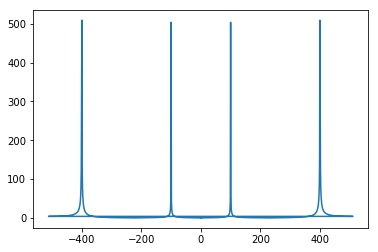

In [11]:
## Here is a real signal
Fs = 1024 # the sampling rate
t = linspace(0,1,Fs)  # time samples
freq = fftfreq(t.shape[-1])
f = sin(2*pi*100*t) + 1.3*sin(2*pi*400*t)# a 100 Hz sand 250 Hz signal
plot(Fs*freq,abs(fft(f)))


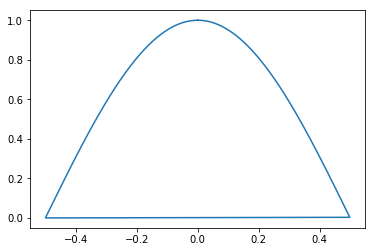

In [12]:
## Here is a very simple smoothing filter
## Notice we pad it out with zeros to match the signal
g = zeros(x.shape[-1])
g[range(2)] = [.5, .5]  # try 1.6 in the middle term. Try 2.
plot(freq,abs(fft(g)))

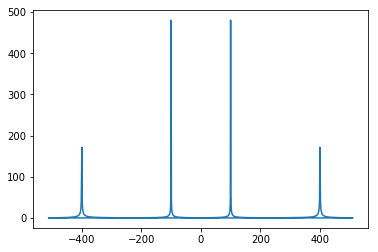

In [13]:
h = convolve(f,g)
h = h[0:1024]  
plot(Fs*freq,abs(fft(h)))

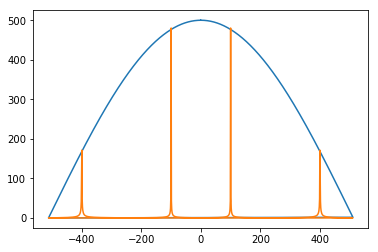

In [16]:
## Look how the plot(Fs*freq,500*abs(fft(g)),Fs*freq,abs(fft(h)))

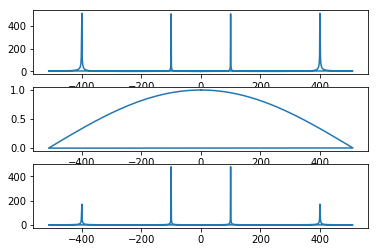

In [20]:
subplot(3,1,1)
plot(Fs*freq,abs(fft(f)))
subplot(3,1,2)
plot(Fs*freq,abs(fft(g)))
subplot(3,1,3)
plot(Fs*freq,abs(fft(h)))


## Haar filter

There are two filters for Harr, with coefficients $[1,1]$ and $[1,-1]$. Or normalized as $[1,1]/\sqrt{2}$, $[1,-1]/\sqrt{2}$.

Let's look at their filter response:

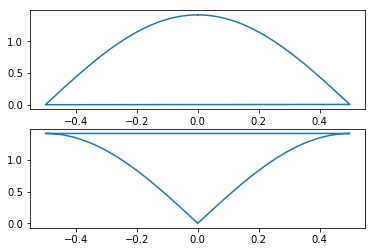

In [23]:
g1 = zeros(x.shape[-1])
g1[range(2)] = [1/sqrt(2),1/sqrt(2)]  
g2 = zeros(x.shape[-1])
g2[range(2)] = [1/sqrt(2),-1/sqrt(2)]  
subplot(2,1,1)
plot(freq,abs(fft(g1)))
subplot(2,1,2)
plot(freq,abs(fft(g2)))

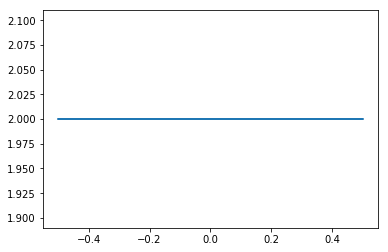

In [24]:
plot(freq,abs(fft(g1))**2 + abs(fft(g2))**2 )

So, their squares sum up to 2. We will use this in contructing many of our wavelets.



## Filters, decimation, Haar wavelet.

Refer to the PDF lecture notes called Wavelets_v4.pdf

[Wavelet lecture notes](Wavelets_v4.pdf)